# Divvy usage over the year

**authors:** Peter Carbonetto, Gao Wang

In this last analysis, we use the Divvy trip data to examine biking trends in Chicago over the course of one year.

We begin by loading a few packages, as well as some additional R functions implemented for this project. The `repr` package is used to adjust the dimensions of the figures in the Jupyter notebook.

In [1]:
library(repr)
library(data.table)
library(ggplot2)
source("../code/functions.R")

## Read the data

First, we read in the Divvy trip and station data from the CSV files.

In [2]:
divvy <- read.divvy.data()

Reading station data from ../data/Divvy_Stations_2016_Q4.csv.
Reading trip data from ../data/Divvy_Trips_2016_Q1.csv.
Reading trip data from ../data/Divvy_Trips_2016_04.csv.
Reading trip data from ../data/Divvy_Trips_2016_05.csv.
Reading trip data from ../data/Divvy_Trips_2016_06.csv.
Reading trip data from ../data/Divvy_Trips_2016_Q3.csv.
Reading trip data from ../data/Divvy_Trips_2016_Q4.csv.
Preparing Divvy data for analysis in R.
Converting dates and times.


To analyze city-wide departures for each day of the year, we create a "day of year" column.

In [3]:
divvy$trips <-
  transform(divvy$trips,
    start.dayofyear = factor(as.numeric(format(divvy$trips$starttime,"%j")),
                             1:366))

We also convert the "start week" column to a factor to make it easier to compile trip statistics for each week in the year.

In [4]:
divvy$trips <- transform(divvy$trips,start.week = factor(start.week,0:52))

## Plot departures per day and per week

Here, we create a new vector containing the number of trips taken in each day of the year, then we plot these numbers.

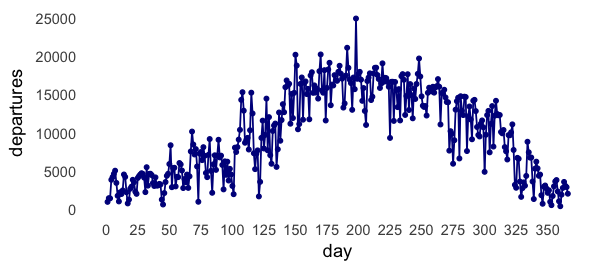

In [5]:
options(repr.plot.width = 5, repr.plot.height = 2.25)
counts.day <- as.vector(table(divvy$trips$start.dayofyear))
ggplot(data.frame(day = 1:366,departures = counts.day),
       aes(x = day,y = departures)) +
  geom_point(color = "darkblue",shape = 19,size = 1) +
  geom_line(color = "darkblue") +
  scale_x_continuous(breaks = seq(0,350,25)) +
  theme_minimal() +
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())

This plot shows a sizeable increase in bike trips during summer days, but since the number of trips varies widely from one day to the next, the plot is expected to look nicer if instead the number of trips are counted *per week*.

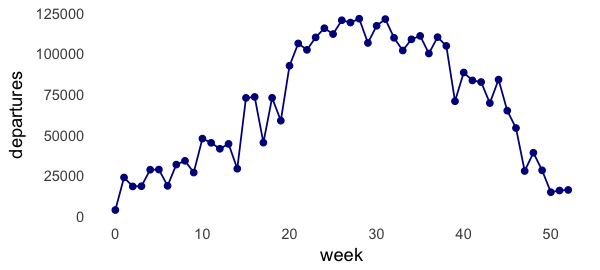

In [6]:
options(repr.plot.width = 5, repr.plot.height = 2.25)
counts.week <- as.vector(table(divvy$trips$start.week))
ggplot(data.frame(week = 0:52,departures = counts.week),
       aes(x = week,y = departures)) +
  geom_point(color = "darkblue",shape = 19,size = 1.5) +
  geom_line(color = "darkblue") +
  theme_minimal() +
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())

Indeed, the seasonal trends are less noisy in this plot; the majority of Divvy bike trips in Chicago are taken when the weather is warmer (weeks 20--40), and very few people are using the Divvy bikes in the cold winter months.

## Seasonal trends at the University of Chicago

When we analyze trips taken at the University of Chicago bike station,
the "bump" during warmer months flattens out. This is probably because
a large fraction of University of Chicago students leave during the
summer.

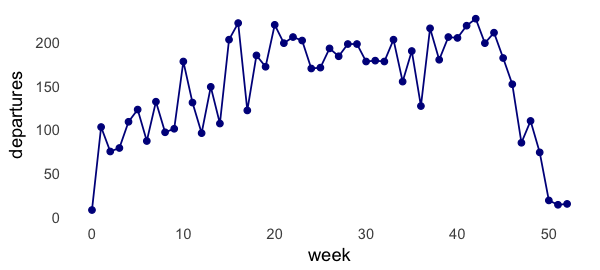

In [7]:
options(repr.plot.width = 5, repr.plot.height = 2.25)
dat <- subset(divvy$trips,from_station_name == "University Ave & 57th St")
counts.week.uchicago <- as.vector(table(dat$start.week))
ggplot(data.frame(week = 0:52,departures = counts.week.uchicago),
       aes(x = week,y = departures)) +
  geom_point(color = "darkblue",shape = 19,size = 1.5) +
  geom_line(color = "darkblue") +
  theme_minimal() +
  theme(panel.grid.major = element_blank(),
	panel.grid.minor = element_blank())

## Session information

This is the version of Jupyter used to generate these results.

In [8]:
system("jupyter --version",intern = TRUE)

[1] "4.3.0"

This is the version of R and the packages that were used to generate these results.

In [9]:
sessionInfo()

R version 3.3.2 (2016-10-31)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Sierra 10.12.5

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ggplot2_2.2.1     data.table_1.10.4 repr_0.12.0      

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.11     assertthat_0.2.0 digest_0.6.12    crayon_1.3.2    
 [5] IRdisplay_0.4.4  plyr_1.8.4       grid_3.3.2       R6_2.2.0        
 [9] jsonlite_1.5     gtable_0.2.0     magrittr_1.5     scales_0.4.1    
[13] evaluate_0.10.1  stringi_1.1.2    lazyeval_0.2.0   uuid_0.1-2      
[17] IRkernel_0.7     labeling_0.3     tools_3.3.2      stringr_1.2.0   
[21] munsell_0.4.3    colorspace_1.3-2 pbdZMQ_0.2-5     tibble_1.2      